# This notebook compares the V15 and V15X prediction errors for different bitstrings

#### Load the data

In [51]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data_w_V15X.pkl')

#### Create a plotting function

In [63]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)
    
    
    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

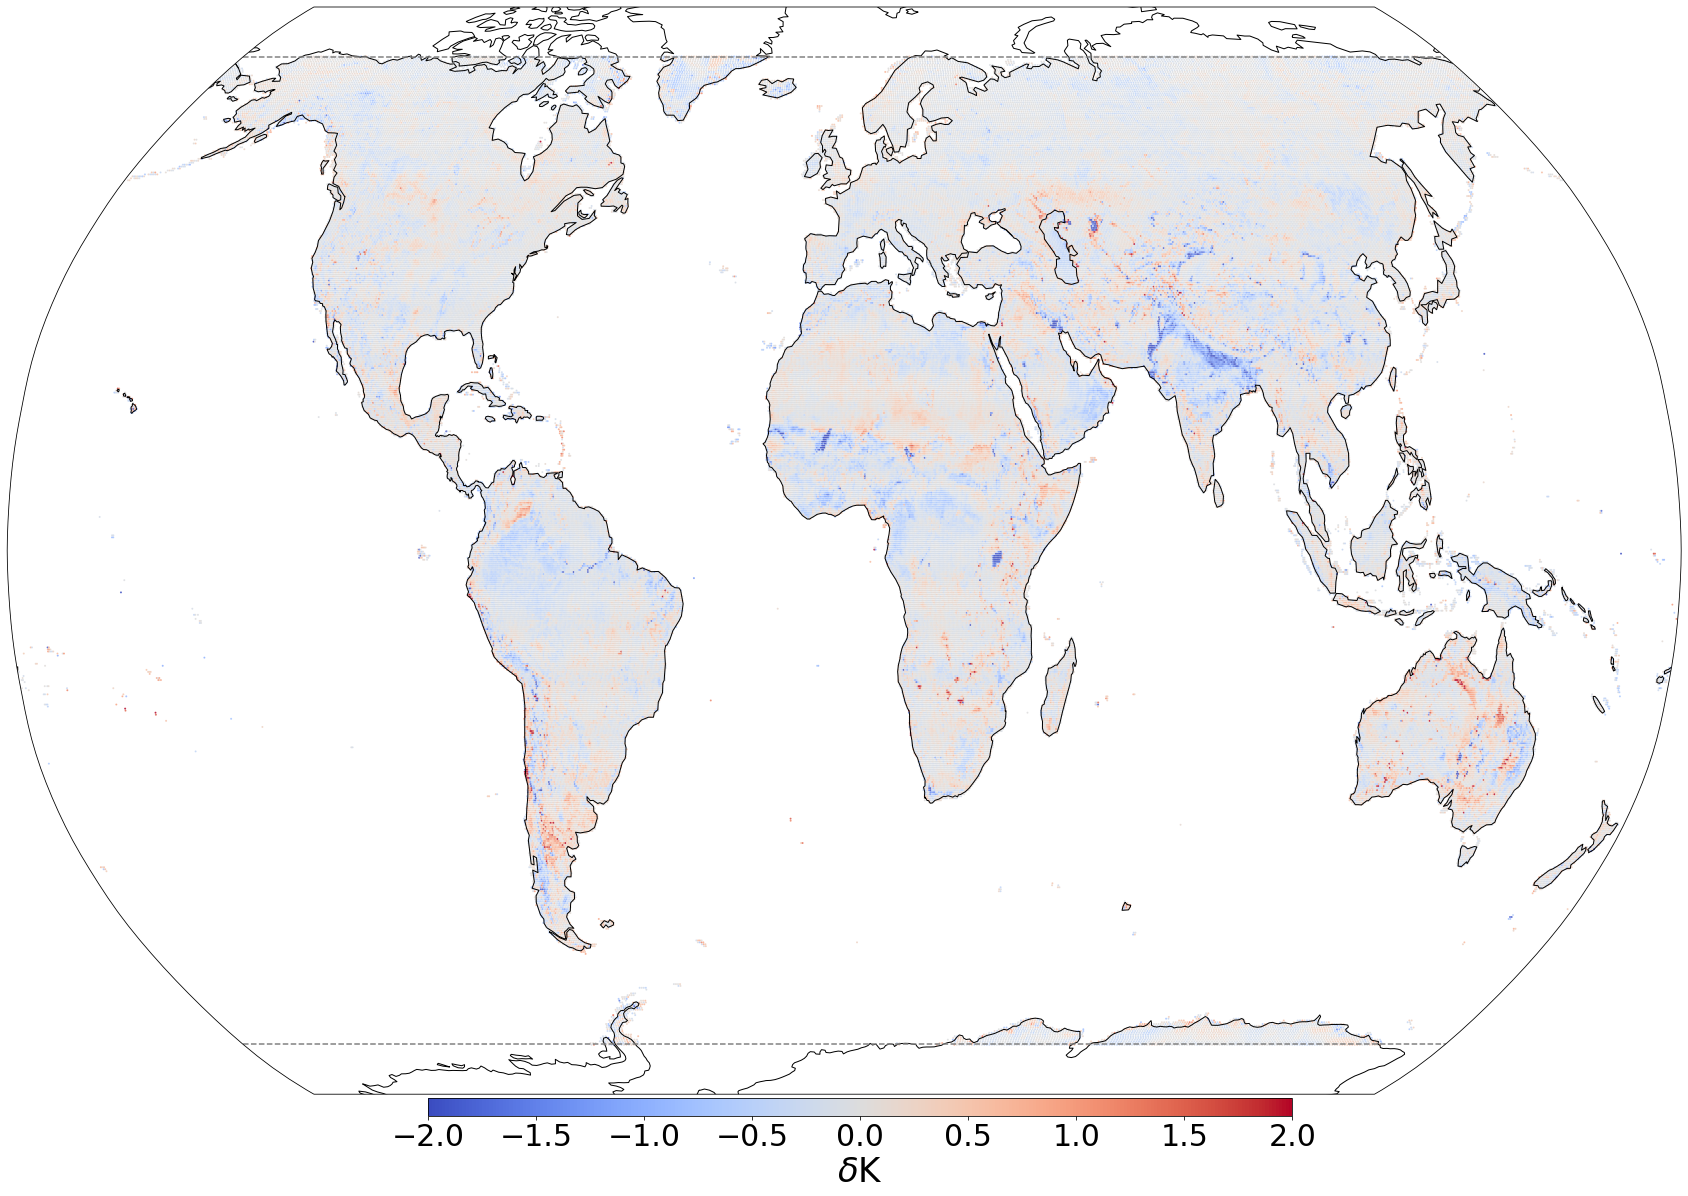

In [53]:
#df.columns
RobinsonPlot(df,'deltaX15',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 1,savefig=None)

## Bitstring 100110 

In [55]:
df_1100110 = df.query('bitstring == "100110"')

#### Check out some of the worst points - these are mentioned in the manuscript

In [70]:
ivals = [0,1,2,3,4]  # #Gujarat, Salt lake city, Peru, Northern Algeria,Australia
i = 5
df_1100110.sort_values(by=['delta'],ascending=False).iloc[i][['latitude_ERA','longitude_ERA','MODIS_LST_x','V15_prediction',
       'V20_prediction', 'V20X_prediction','V15X_prediction','V15_error','V20_error','V20X_error','V15X_error','delta','deltaX','deltaX15']]

latitude_ERA        -2.388758
longitude_ERA            36.0
MODIS_LST_x        317.764832
V15_prediction      319.64621
V20_prediction     312.096069
V20X_prediction    312.352997
V15X_prediction    314.739288
V15_error            4.133606
V20_error             6.05593
V20X_error           6.297548
V15X_error           4.640535
delta                1.922324
deltaX               2.163942
deltaX15             0.506929
Name: 38367, dtype: object

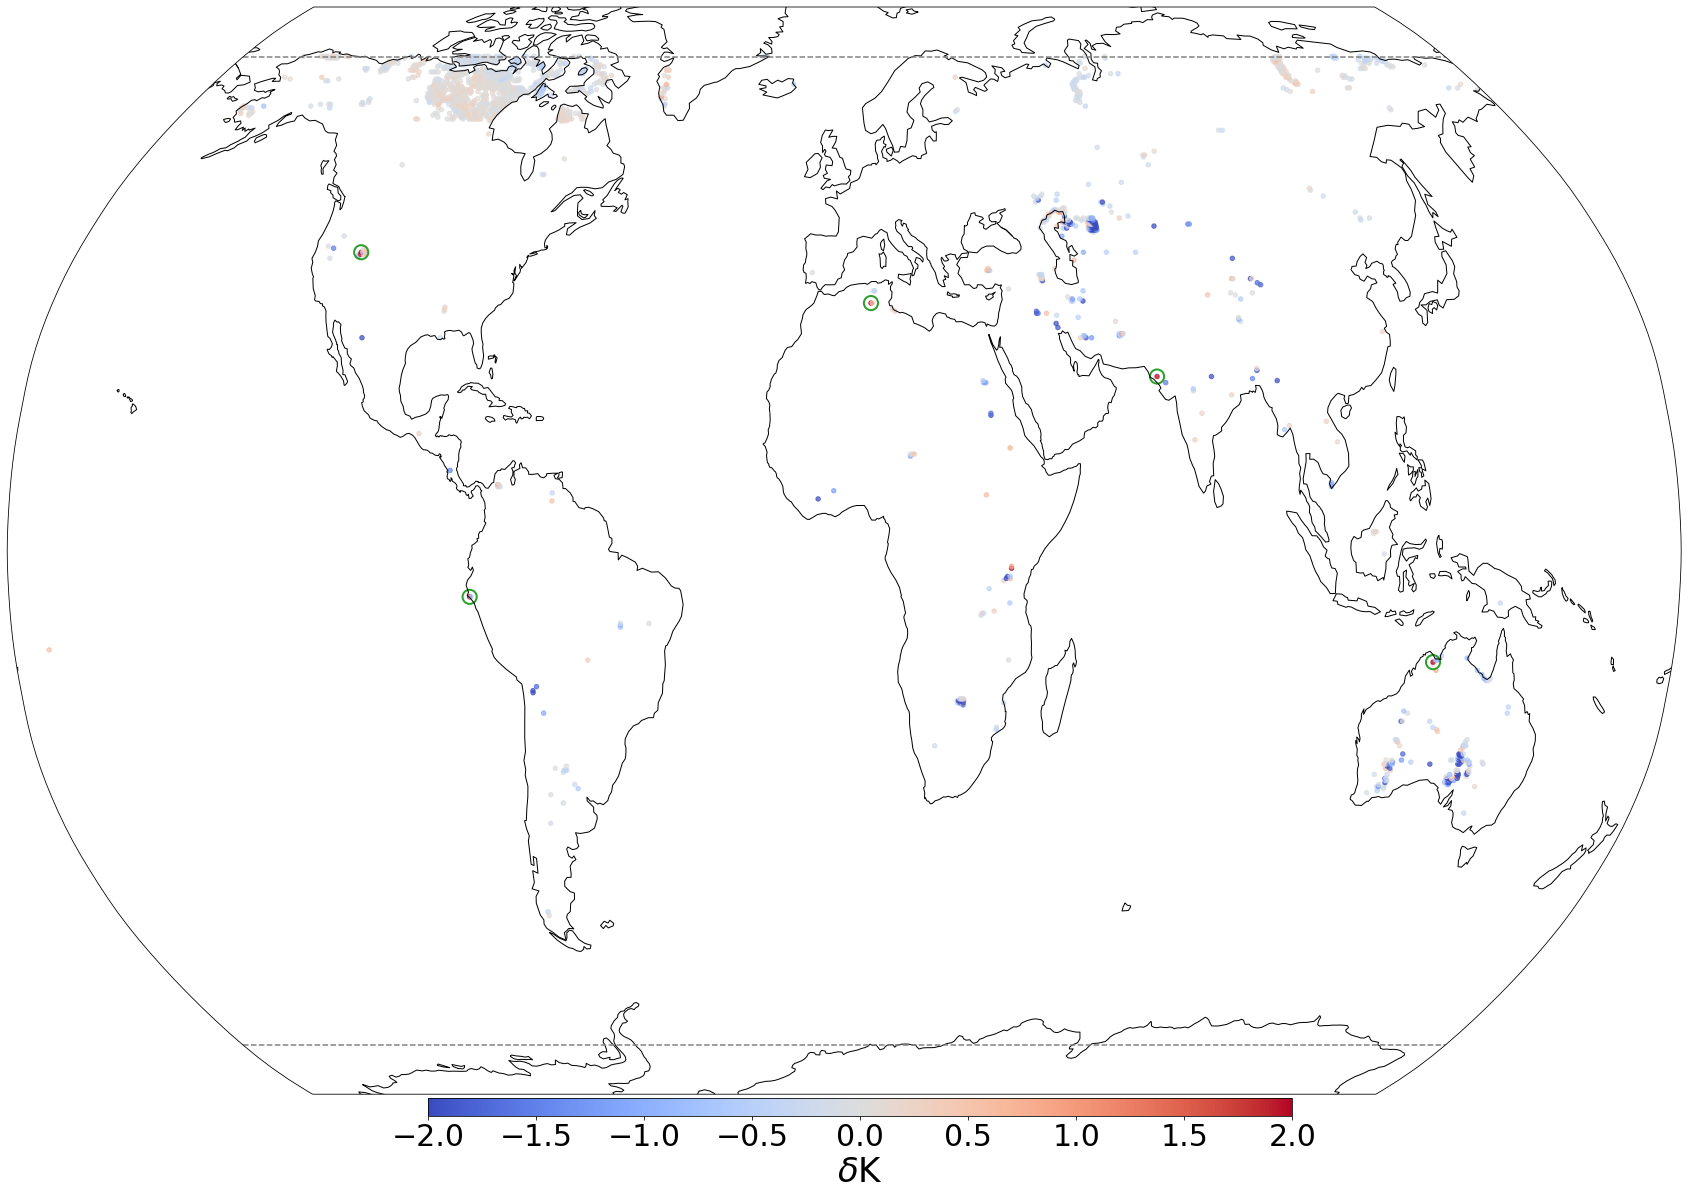

In [64]:
RobinsonPlot(df_1100110,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=5)

In [12]:
df_1100110.sort_values(by=['delta'],ascending=False).iloc[0:5][['latitude_ERA','longitude_ERA','delta','deltaX','deltaX15']]

,latitude_ERA,longitude_ERA,delta,deltaX,deltaX15
71529,24.028095,69.00000,5.123649,6.272882,-2.344527
101086,41.170945,-113.40000,4.876928,2.530676,-0.319114
33374,-6.323183,-80.71875,2.772430,6.922798,-1.288017
89090,34.145187,6.08000,2.532175,0.257852,-1.084665
24181,-15.316154,127.96875,2.315439,3.142792,1.516639


#### Which points saw the greatest improvement in delta?

In [12]:
df_1100110['delta_change'] = df_1100110['deltaX'] - df_1100110['delta']

/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_1100110.sort_values(by=['delta_change'],ascending=True)#.iloc[i]

,latitude_ERA,longitude_ERA,MODIS_LST,V15_prediction,V20_prediction,V20X_prediction,V15_error,V20_error,V20X_error,delta,...,V20_dl,percentage_change_in_dl,cl_change_is_significant,si10_change_is_significant,cvh_change_is_significant,cvl_change_is_significant,lsm_change_is_significant,dl_change_is_significant,bitstring,delta_change
86756,32.740036,43.52000,311.081909,301.419189,303.957611,307.525848,9.741612,7.397593,4.090796,-2.344019,...,18.000000,-0.550000,True,False,False,False,True,True,100110,-3.306798
84331,31.334884,47.68000,301.999573,316.069397,312.127869,308.212158,14.092155,10.296273,7.264714,-3.795882,...,6.725586,2.394283,True,False,False,False,True,True,100110,-3.031559
56016,13.348942,14.34375,306.201447,316.980011,316.964905,314.346619,10.798612,10.768510,8.209530,-0.030102,...,5.000000,0.250000,True,False,False,False,True,True,100110,-2.558980
149660,70.117048,-24.00000,258.501343,265.115753,265.274750,261.810822,7.608796,7.365232,4.990395,-0.243564,...,123.036133,-0.694928,True,False,False,False,True,True,100110,-2.374837
101086,41.170945,-113.40000,294.736176,294.245392,302.931915,299.788849,3.573472,8.450400,6.104148,4.876928,...,27.000000,8.000000,True,False,False,False,True,True,100110,-2.346252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63546,18.969549,32.06250,316.277527,320.372620,317.470917,311.540253,4.357863,2.710044,5.682619,-1.647819,...,3.000000,-0.880000,True,False,False,False,True,True,100110,2.972575
55695,13.067912,14.34375,300.874603,304.265411,302.596771,306.583191,3.554063,2.387391,5.731228,-1.166672,...,5.000000,0.250000,True,False,False,False,True,True,100110,3.343837
33374,-6.323183,-80.71875,311.564301,308.391449,304.894409,300.358093,4.953901,7.726332,11.876699,2.772430,...,30.428711,1.354288,True,False,False,False,True,True,100110,4.150368
7807,-31.053854,139.84000,312.795837,311.083374,313.424377,320.634888,3.297467,3.304563,7.871571,0.007096,...,1.000000,-0.819813,True,False,False,False,True,True,100110,4.567008


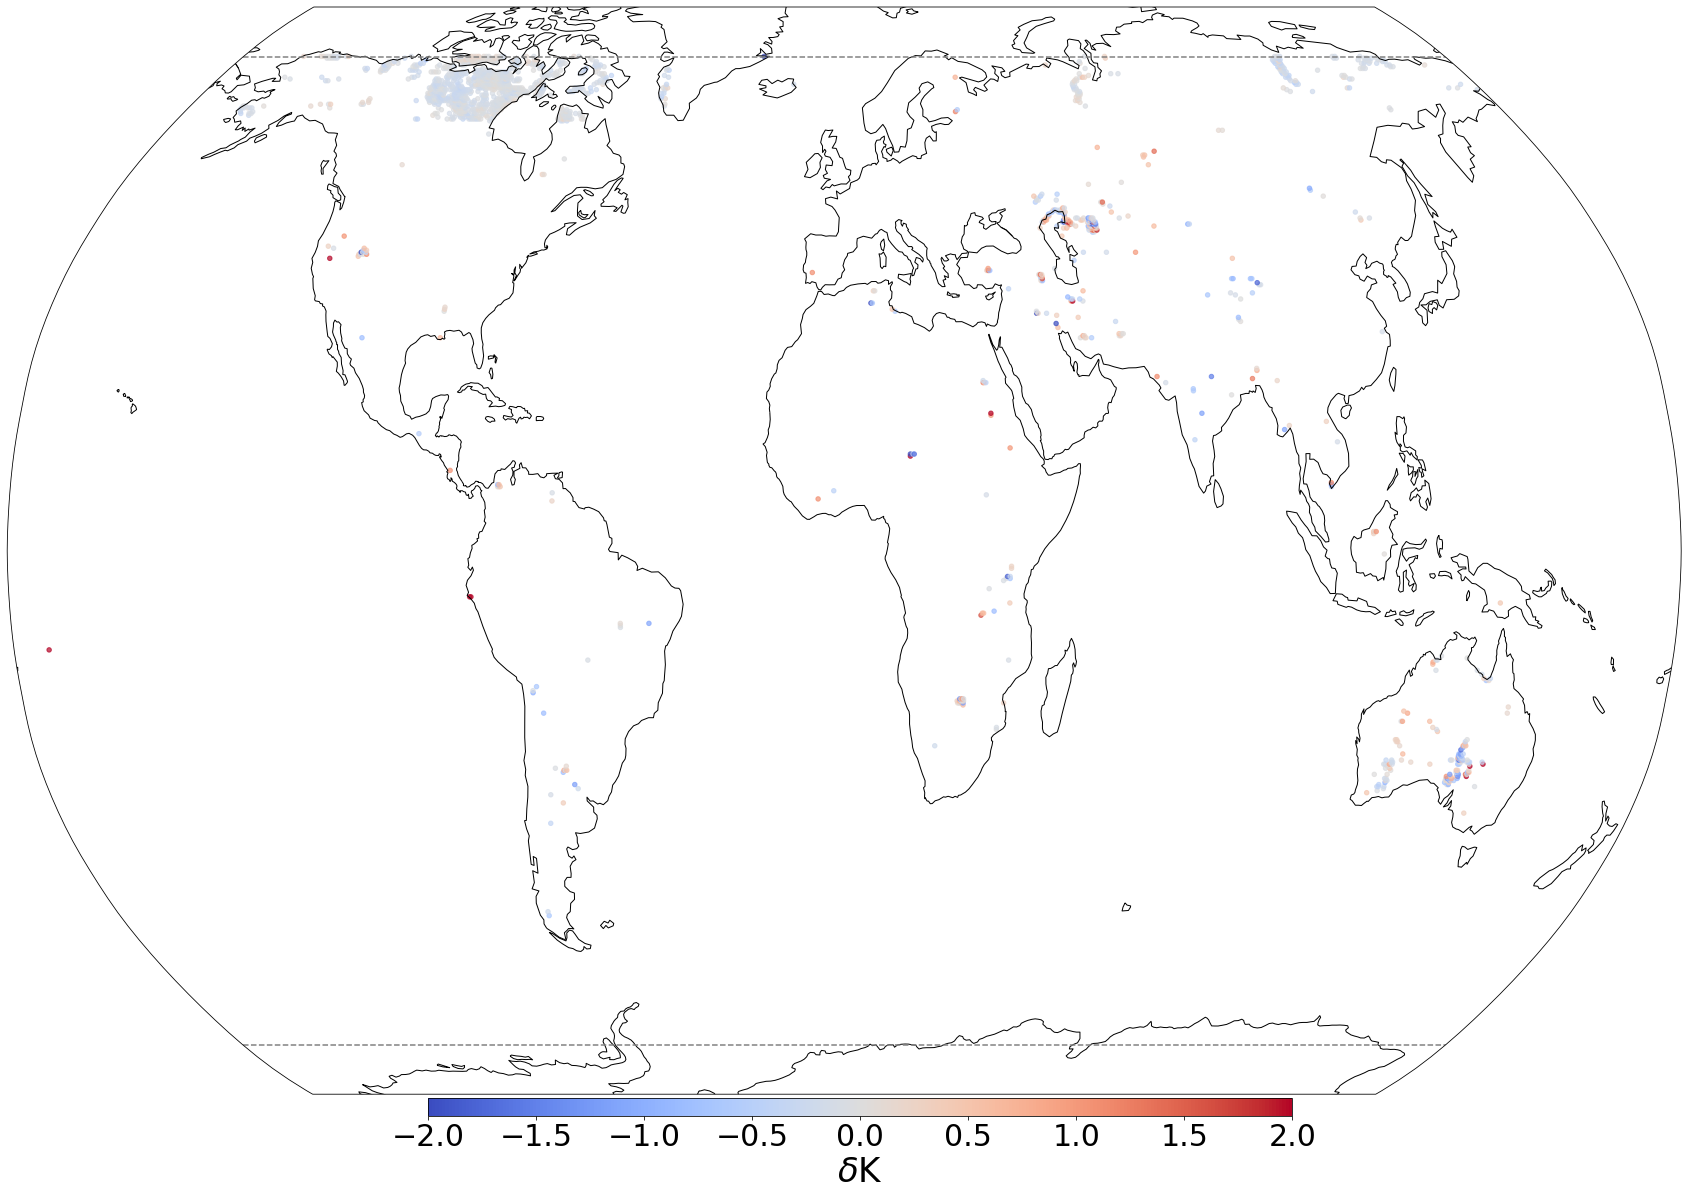

In [16]:
RobinsonPlot(df_1100110,'delta_change',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 100,savefig=None)

#### Isolate northern canada and lena river

In [25]:
northern_canada = df_1100110.query('-141 < longitude_ERA < -92 & 60 < latitude_ERA < 70')
lena_river = df_1100110.query('119 < longitude_ERA < 136 & 62 < latitude_ERA < 74')

#RobinsonPlot(northern_canada,'delta_change',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 100,savefig=None)
#RobinsonPlot(lena_river,'delta_change',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 100,savefig=None)

high_latitutde_regions = pd.concat([northern_canada,lena_river])

In [29]:
high_latitutde_regions.delta.mean()

0.02660809

In [30]:
high_latitutde_regions.deltaX.mean()

-0.0778467

## Bitstring 000101 

In [31]:
df_000101 = df.query('bitstring == "000101"')

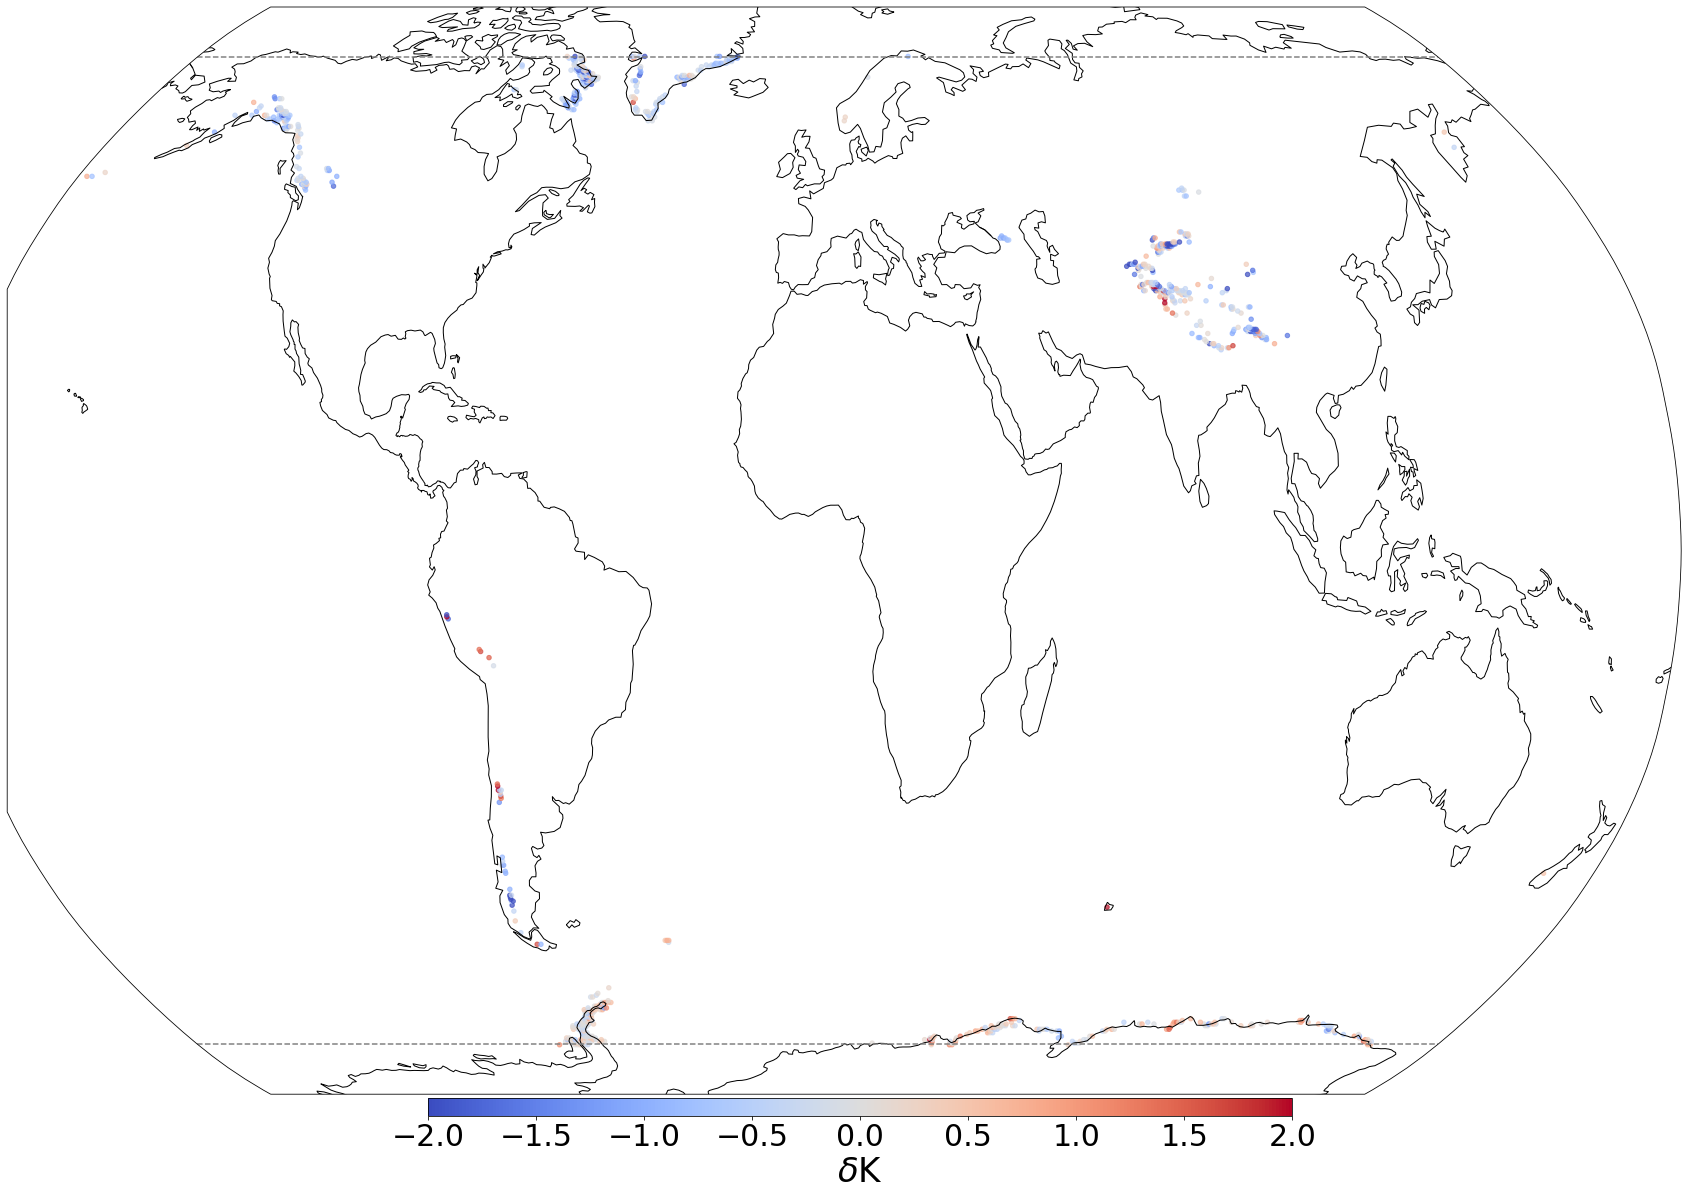

In [32]:
RobinsonPlot(df_000101,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None)

In [33]:
#Alaskan gulf point
df_000101.sort_values(by=['delta'],ascending=False).iloc[0]

latitude_ERA                         59.99997
longitude_ERA                     -141.866667
MODIS_LST                          271.977448
V15_prediction                     277.694244
V20_prediction                     261.428802
V20X_prediction                    275.110748
V15_error                            6.214495
V20_error                           10.868941
V20X_error                           4.763571
delta                                4.654447
deltaX                              -1.450924
values                                  37428
step                          0 days 00:00:00
surface                                   0.0
latitude                             59.99997
longitude                         -141.866667
change_in_cl                          0.00121
V15_cl                                    0.0
V20_cl                                0.00121
percentage_change_in_cl                   inf
heightAboveGround                        10.0
change_in_si10                    

## Bitstring 010100 

In [5]:
df_010100 = df.query('bitstring == "010100"')

In [9]:
blob = df_010100[['latitude_ERA', 'longitude_ERA', 'delta','deltaX']].iloc[0]

In [13]:
display(df_010100)

,latitude_ERA,longitude_ERA,MODIS_LST,V15_prediction,V20_prediction,V20X_prediction,V15X_prediction,V15_error,V20_error,V20X_error,...,V15_dl,V20_dl,percentage_change_in_dl,cl_change_is_significant,si10_change_is_significant,cvh_change_is_significant,cvl_change_is_significant,lsm_change_is_significant,dl_change_is_significant,bitstring
4389,-37.798581,148.666667,293.302094,291.919373,304.229431,295.274445,291.161194,2.645613,10.927361,2.912897,...,25.000000,33.034180,0.321367,False,False,True,False,False,True,010100
38577,-2.107728,-54.000000,301.163452,305.001984,310.202728,301.280975,300.173248,3.878059,9.039287,1.625511,...,3.000000,10.000000,2.333333,False,False,True,False,False,True,010100
40088,-0.983606,98.718750,299.748657,299.439484,311.325012,300.483948,306.522888,2.597664,11.576346,2.598799,...,25.000000,128.749023,4.149961,False,False,True,False,False,True,010100
40808,-0.421546,132.187500,300.560242,297.746429,310.297333,300.102692,304.145630,3.412266,9.773700,2.084944,...,25.000000,573.608398,21.944336,False,False,True,False,False,True,010100
40928,-0.140515,-50.062500,301.993317,306.742126,312.982605,301.182617,301.609406,4.794086,10.989294,2.396937,...,25.000000,9.286133,-0.628555,False,False,True,False,False,True,010100
44374,2.950819,112.218750,302.328308,301.873413,311.749878,301.558868,305.217560,2.602192,9.421556,2.369967,...,25.000000,7.783203,-0.688672,False,False,True,False,False,True,010100
54271,11.662760,102.937500,302.128815,301.170654,310.106628,301.548187,301.405151,2.352256,7.994905,2.430140,...,25.000000,10.099609,-0.596016,False,False,True,False,False,True,010100
69458,22.903974,-83.400000,301.717712,302.266846,313.267120,302.097168,306.653320,1.793129,11.549413,2.049138,...,25.000000,298.899414,10.955976,False,False,True,False,False,True,010100
86246,32.459005,34.880000,303.553070,304.888947,310.035553,302.497620,308.164948,2.516774,6.489748,2.654187,...,25.000000,41.237305,0.649492,False,False,True,False,False,True,010100
89842,34.426218,131.333333,291.155426,292.753540,303.266937,291.036896,291.390503,2.277692,12.111497,2.176783,...,25.000000,33.124023,0.324961,False,False,True,False,False,True,010100


In [14]:
display(df_010100.iloc[0])

latitude_ERA                       -37.798581
longitude_ERA                      148.666667
MODIS_LST                          293.302094
V15_prediction                     291.919373
V20_prediction                     304.229431
V20X_prediction                    295.274445
V15X_prediction                    291.161194
V15_error                            2.645613
V20_error                           10.927361
V20X_error                           2.912897
V15X_error                           2.892501
delta                                8.281747
deltaX                               0.267284
deltaX15                             0.246887
values                                 435389
step                          0 days 00:00:00
surface                                   0.0
latitude                           -37.798581
longitude                          148.666667
change_in_cl                         0.007793
V15_cl                                    0.0
V20_cl                            

In [10]:
blob.latitude_ERA

-37.798581306687026

In [11]:
blob.longitude_ERA

148.66666666666663

In [16]:
df_010100.sort_values(by=['delta'],ascending=False).iloc[4]

latitude_ERA                        -0.983606
longitude_ERA                        98.71875
MODIS_LST                          299.748657
V15_prediction                     299.439484
V20_prediction                     311.325012
V20X_prediction                    300.483948
V15_error                            2.597664
V20_error                           11.576346
V20X_error                           2.598799
delta                                8.978683
deltaX                               0.001135
values                                 275231
step                          0 days 00:00:00
surface                                   0.0
latitude                            -0.983606
longitude                            98.71875
change_in_cl                         0.000036
V15_cl                                    0.0
V20_cl                               0.000036
percentage_change_in_cl                   inf
heightAboveGround                        10.0
change_in_si10                    

In [23]:
df_010100[['latitude_ERA', 'longitude_ERA', 'V15_cl', 'V15_cvh', 'V20_cvh']]

,latitude_ERA,longitude_ERA,V15_cl,V15_cvh,V20_cvh
4389,-37.798581,148.666667,0.000000,0.612854,0.0
38577,-2.107728,-54.000000,0.473621,0.533661,0.0
40088,-0.983606,98.718750,0.000000,0.521362,0.0
40808,-0.421546,132.187500,0.000000,0.493011,0.0
40928,-0.140515,-50.062500,0.000000,0.596222,0.0
44374,2.950819,112.218750,0.000000,0.591125,0.0
54271,11.662760,102.937500,0.000000,0.413391,0.0
69458,22.903974,-83.400000,0.000000,0.561340,0.0
86246,32.459005,34.880000,0.000000,0.413116,0.0
89842,34.426218,131.333333,0.000000,0.446869,0.0


In [29]:
df_010100.iloc[1].latitude

-2.10772769472398

## Bitstring 011100

In [1]:
df_011100 = df.query('bitstring == "011100"')

NameError: name 'df' is not defined